<a href="https://colab.research.google.com/github/Srija-Swarna/Deep-learning-model-for-Early-detection-of-plant-nutritional-deficiencies/blob/main/EDA_of_the_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict
import random
from PIL import Image
import matplotlib.pyplot as plt
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageStat
import os
import numpy as np
from skimage import io, color
from skimage.filters import rank
from skimage.morphology import disk
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import defaultdict
import random
from PIL import Image, ImageStat
import matplotlib.pyplot as plt
from collections import defaultdict

**Distribution of Class in Train test val dataset.**

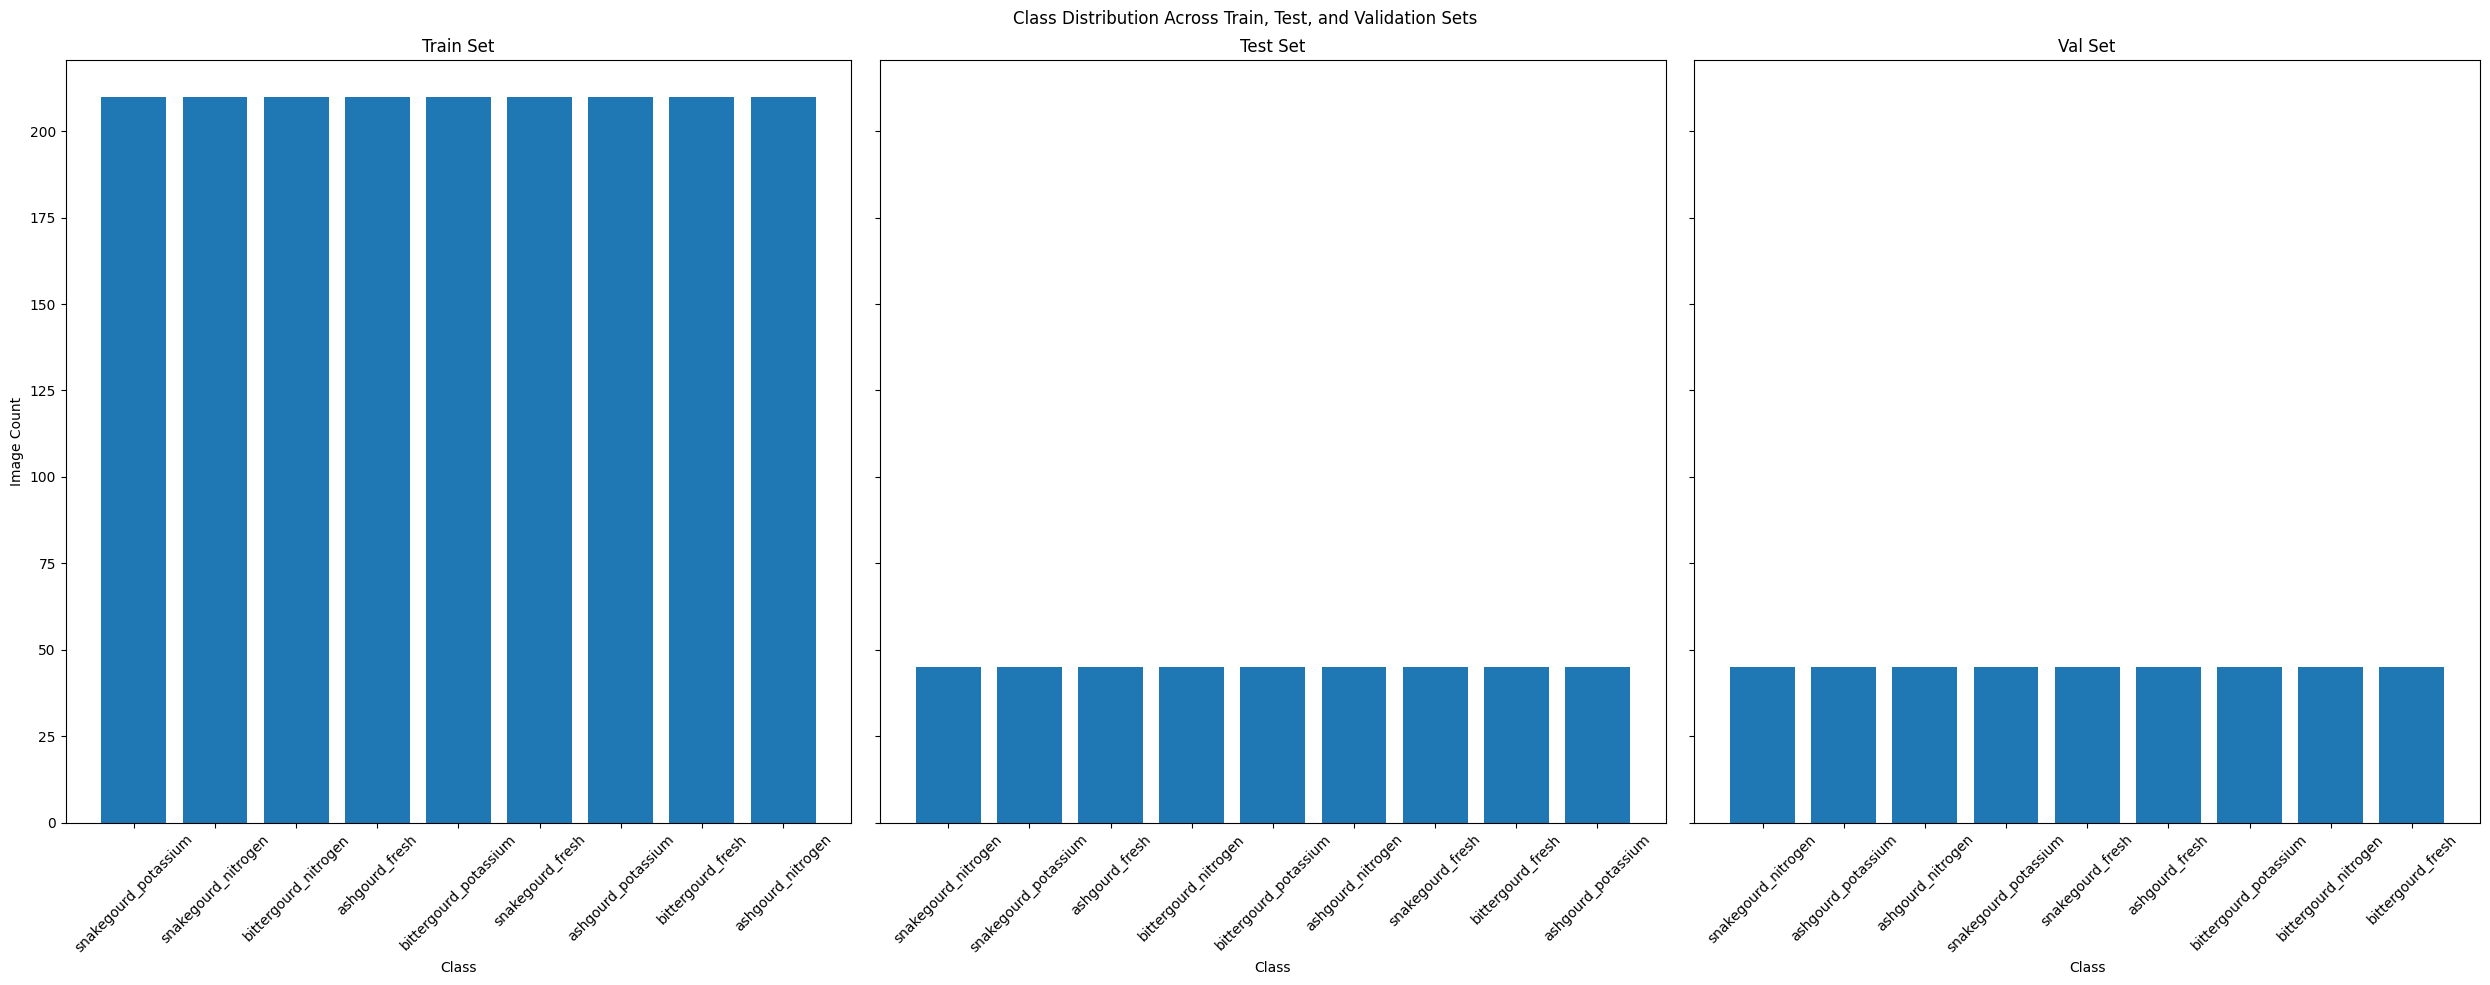

In [2]:
# Define the base directory
base_dir = r"/content/drive/MyDrive/Deep learning model for Early detection of plant nutritional deficiencies"

# Function to count images in each class for train, test, and validation sets
def count_images_in_folders(base_dir):
    class_counts = defaultdict(lambda: defaultdict(int))
    for split in ['train', 'test', 'val']:
        split_path = os.path.join(base_dir, split)
        if os.path.exists(split_path):
            for class_name in os.listdir(split_path):
                class_dir = os.path.join(split_path, class_name)
                if os.path.isdir(class_dir):
                    class_counts[split][class_name] = len(os.listdir(class_dir))
    return class_counts

# Get the class distribution
class_distribution = count_images_in_folders(base_dir)


fig, ax = plt.subplots(1, 3, figsize=(25, 10), sharey=True)

for idx, split in enumerate(['train', 'test', 'val']):
    class_counts = class_distribution.get(split, {})
    ax[idx].bar(class_counts.keys(), class_counts.values())
    ax[idx].set_title(f"{split.capitalize()} Set")
    ax[idx].set_xlabel("Class")
    ax[idx].set_ylabel("Image Count" if idx == 0 else "")
    ax[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.suptitle("Class Distribution Across Train, Test, and Validation Sets")
plt.tight_layout()
plt.show()


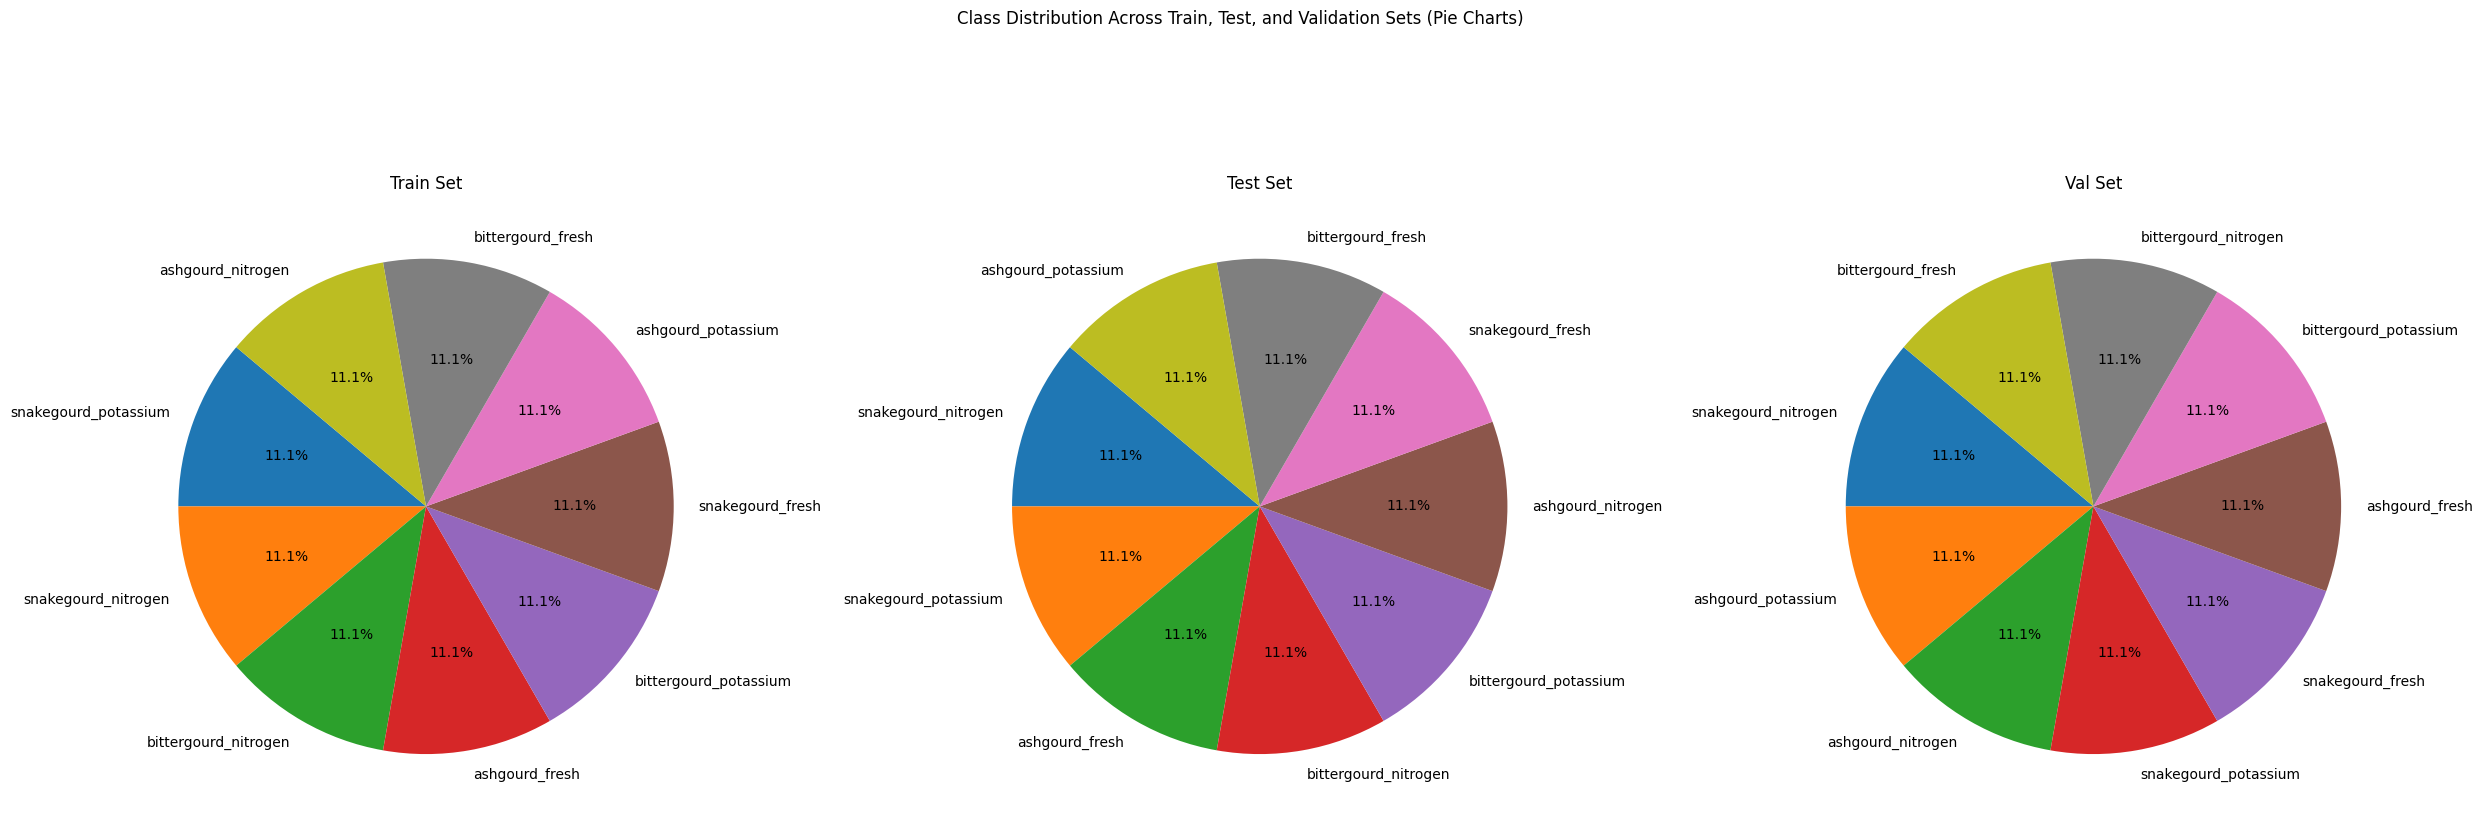

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(25, 10))

for idx, split in enumerate(['train', 'test', 'val']):
    class_counts = class_distribution.get(split, {})
    ax[idx].pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
    ax[idx].set_title(f"{split.capitalize()} Set")

plt.suptitle("Class Distribution Across Train, Test, and Validation Sets (Pie Charts)")
plt.tight_layout()
plt.show()